# Problem Set 2. Quantative Macro

## Alena Sokolyanskaya

## Question 1. Computing Transitions in a Representative Agent Economy

[.1] We define Lagrangian:

$\Lambda = \sum \beta^{t} u(c_{t}) - \lambda_{t} (c_{t} +k_{t+1} - k_{t}^{1-\theta}(zh_{t})^{\theta} - (1-\delta)k_{t})$

[.2] Calculating FOCs wrt $c_{t}$ and $k_{t+1}$:

$[c_{t}]: \beta u'(c_{t}) = \lambda_{t}$

$[k_{t+1}]: \lambda_{t} = \lambda_{t+1}(1-\delta+(1-\theta)k_{t+1}^{-\theta}(zh_{t+1})^{\theta})$

In the SS $k_{t+1} = k_{t} = k^{ss}$ and $c_{t+1} = c_{t} = c^{ss}$.

[.3] We get that:

$k^{ss} = \left[ \dfrac{(1-\theta)(zh)^{\theta}}{\dfrac{1}{\beta} - 1 + \delta} \right]^{1/\theta}$

$i^{ss} = k^{ss} - (1-\delta) k^{ss} = \delta k^{ss}$

Since we need to choose $z$ to match an annual capital-output ratio of 4, and an
investment-output ratio of $.25$.


[.4] Since $\dfrac{i^{ss}}{y ^{ss}} = .25$:

$c^{ss} + i^{ss} = y^{ss}$

$ \dfrac{c^{ss}}{y^{ss}} + \dfrac{i^{ss}}{y ^{ss}} = 1$

$c^{ss} = 0.75 y^{ss}$

and since $\dfrac{k^{ss}}{y ^{ss}} = 4$ we can define  $\beta$:

$\dfrac{k}{y} = \dfrac{k^{\theta}}{(zh)^{\theta}} = \left[ \dfrac{(1-\theta)^{1/\theta}zh}{(\dfrac{1}{\beta} - 1 + \delta)^{1/\theta} zh} \right]^{\theta} = \dfrac{1-\theta}{\dfrac{1}{\beta} - 1 + \delta}$

$ \beta = \dfrac{1}{\dfrac{1-\theta}{4} +1 -\delta}$

[.5] Therefore we can identify z:

Normalizing $y=1$, from $y=k^{1-\theta} (zh)^{\theta}$ we get:

$z = \left[ \dfrac{\dfrac{1}{\beta} -1 + \delta}{1-\theta} \right]^{\dfrac{1-\theta}{\theta}} \dfrac{1}{h}$




## First steady state

In [2]:
#  First steady state.
theta = 0.67
h = 0.31
delta = 1/16
beta = 1/((1-theta)/4 +1 - delta)
z = ((1/beta - 1 + delta)/(1-theta))**((1-theta)/theta)*(1/h)

k_ss1 =((1-beta*(1-delta))/(beta*(1-theta)*(z*h)**theta))**(-1/theta)
y_ss1 = k_ss1**(1-theta)*(z*h)**theta
c_ss1 = 0.75*y_ss1
i_ss1 = delta*k_ss1

print('k_ss1 =', k_ss1)
print('y_ss1 =', y_ss1)
print('c_ss1 =', c_ss1)
print('i_ss1 =', i_ss1)

k_ss1 = 3.9999999999999964
y_ss1 = 0.9999999999999999
c_ss1 = 0.7499999999999999
i_ss1 = 0.24999999999999978


## Second steady state. Double permanently the productivity parameter z.

In [3]:
#  Second steady state. Double permanently the productivity parameter z.
theta = 0.67
h = 0.31
delta = 1/16
beta = 1/((1-theta)/4 +1 - delta)
z_new = 2*(((1/beta - 1 + delta)/(1-theta))**((1-theta)/theta)*(1/h))

k_ss2 =((1-beta*(1-delta))/(beta*(1-theta)*(z_new*h)**theta))**(-1/theta)
y_ss2 = k_ss2**(1-theta)*(z_new*h)**theta
c_ss2 = 0.75*y_ss2
i_ss2 = delta*k_ss2

print('k_ss2 =', k_ss2)
print('y_ss2 =', y_ss2)
print('c_ss2 =', c_ss2)
print('i_ss2 =', i_ss2)

k_ss2 = 7.99999999999999
y_ss2 = 1.9999999999999991
c_ss2 = 1.4999999999999993
i_ss2 = 0.4999999999999994


## Transition. Compute the transition from the first to the second steady state and report the time-path for savings, consumption, labor and output.

period 0 K 3.9999999999999964 Y 0.9999999999999999 C 0.7499999999999999 I 0.24999999999999978
period 1 K 3.9999999999999964 Y 1.591072967509837 C 1.1933047256323777 I 0.3977682418774593
period 2 K 4.147768241877456 Y 1.6102343207854413 C 1.207675740589081 I 0.40255858019636026
period 3 K 4.291091306956475 Y 1.6283871227329478 C 1.221290342049711 I 0.40709678068323685
period 4 K 4.429994880954933 Y 1.645596534138316 C 1.234197400603737 I 0.411399133534579
period 5 K 4.5645193344298285 Y 1.6619221143052632 C 1.2464415857289475 I 0.4154805285763157
period 6 K 4.69471740460428 Y 1.6774184680782884 C 1.2580638510587163 I 0.4193546170195721
period 7 K 4.820652183836085 Y 1.692135797674048 C 1.269101848255536 I 0.423033949418512
period 8 K 4.9423953717648414 Y 1.7061203761309203 C 1.2795902820981901 I 0.4265300940327301
period 9 K 5.060025755062268 Y 1.7194149557671212 C 1.289561216825341 I 0.42985373894178025
period 10 K 5.173627884312657 Y 1.7320591223984776 C 1.2990443417988582 I 0.4330147

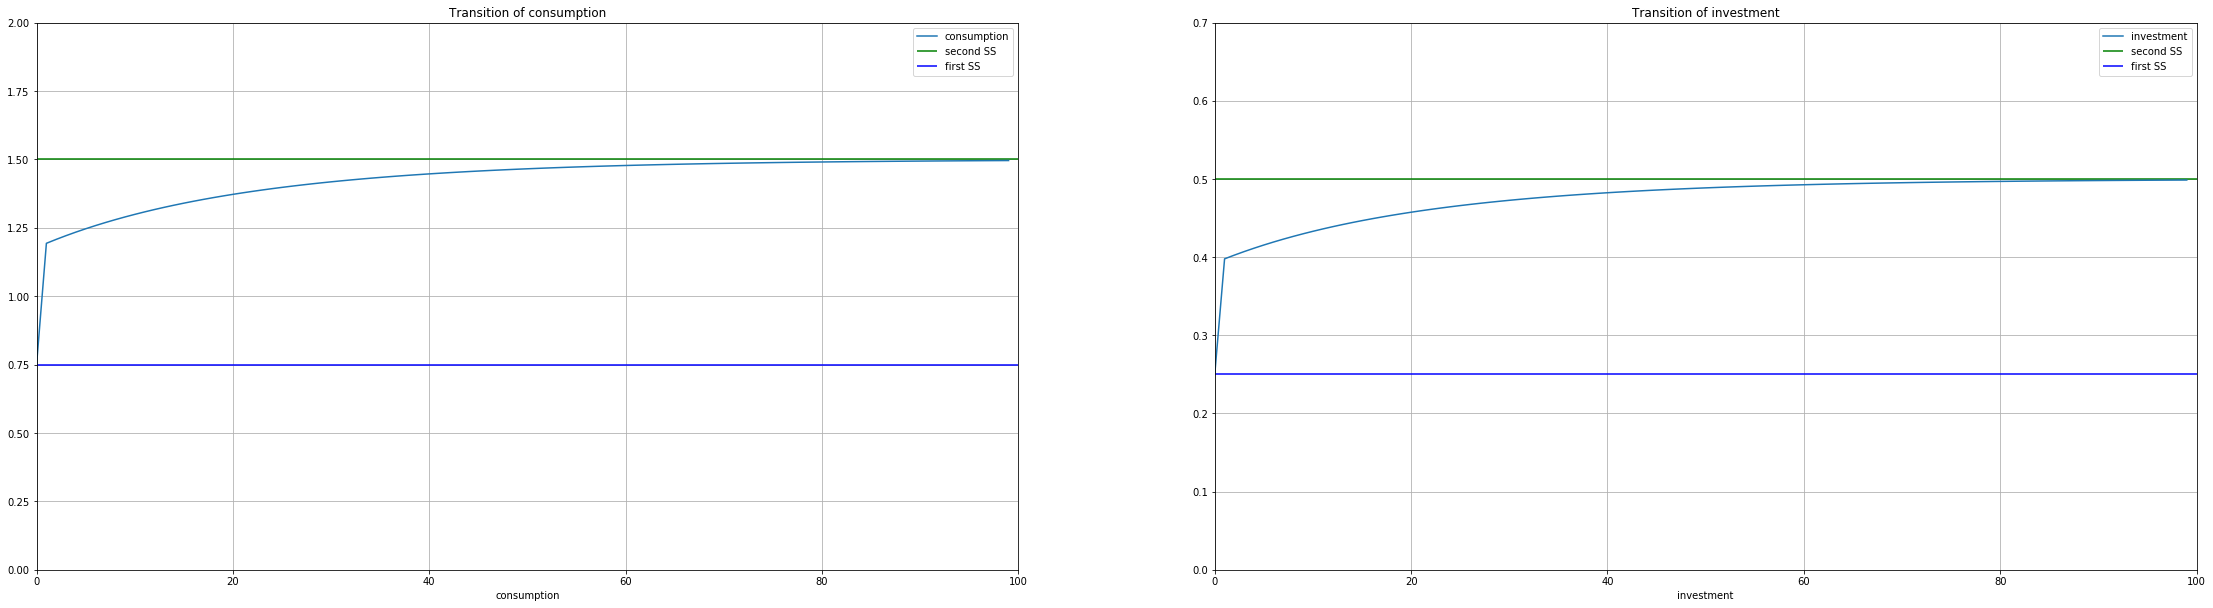

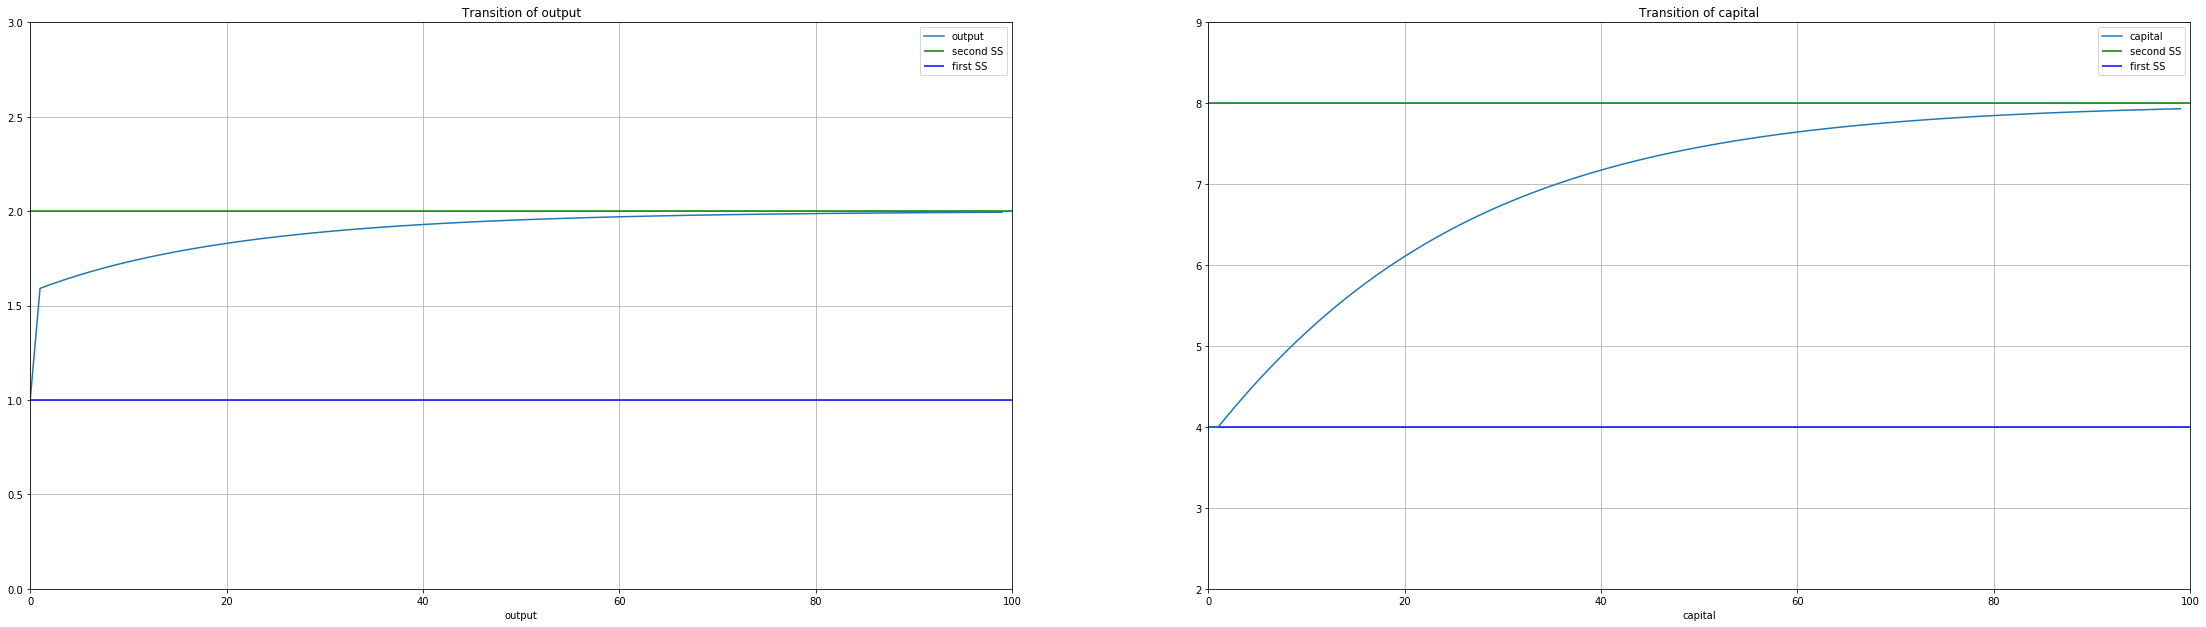

In [5]:
# Transition. Compute the transition from the first to the second steady state and report the time-path for savings, consumption, labor and output.
import sympy as sy
import numpy as np
import math
import matplotlib.pyplot as plt

period=100
k = np.empty(period)
y = np.empty(period)
c = np.empty(period)
i = np.empty(period)

k[0] = k_ss1
y[0] = y_ss1
c[0] = c_ss1
i[0] = i_ss1

for t in range(period-1):
    print('period', t, 'K', k[t], 'Y', y[t], 'C', c[t], 'I',i[t])
    k[t+1] = y[t] - c[t] + (1-delta)*k[t]
    #i[t+1] = k[t+2] - (1-delta)*k[t+1]
    y[t+1] = k[t+1]**(1-theta)*(z_new*h)**theta
    #c[t+1] = beta*c[t]*(1-delta+(1-theta)*k[t+1]**(-theta)*(z*h)**theta)
    #c[t+1] = y[t+1] - i[t+1]
    #c[t+1] = c[t]*beta*((1-theta)*y[t+1]/k[t+1]+1-delta)
    c[t+1] = 0.75* y[t+1]
    i[t+1] = y[t+1]-c[t+1]
    
plt.figure(1)

plt.subplot(121)
t=range(period)
plt.plot(t,c,label='consumption')
plt.xlim([0,100])
plt.ylim([0,2])
plt.xlabel('time')
plt.xlabel('consumption')
plt.grid(True)
plt.title('Transition of consumption')
#plt.rcParams["figure.figsize"] = (2,1)
plt.hlines(c_ss2, 0, 100, colors='green', label = 'second SS')
plt.hlines(c_ss1, 0, 100, colors='blue', label = 'first SS')
plt.legend()

plt.subplot(122)
t=range(period)
plt.plot(t,i,label='investment')
plt.xlim([0,100])
plt.ylim([0,0.7])
plt.xlabel('time')
plt.xlabel('investment')
plt.grid(True)
plt.title('Transition of investment')
plt.hlines(i_ss2, 0, 100, colors='green', label = 'second SS')
plt.hlines(i_ss1, 0, 100, colors='blue', label = 'first SS')
plt.legend()
plt.subplots_adjust(top=2, bottom=0.1, left=0, right=5, hspace=1, wspace=0.2)

plt.figure(2)

plt.subplot(221)
t=range(period)
plt.plot(t,y,label='output')
plt.xlim([0,100])
plt.ylim([0,3])
plt.xlabel('time')
plt.xlabel('output')
plt.grid(True)
plt.title('Transition of output')
#plt.rcParams["figure.figsize"] = (2,1)
plt.hlines(y_ss2, 0, 100, colors='green', label = 'second SS')
plt.hlines(y_ss1, 0, 100, colors='blue', label = 'first SS')
plt.legend()

plt.subplot(222)
t=range(period)
plt.plot(t,k,label='capital')
plt.xlim([0,100])
plt.ylim([2,9])
plt.xlabel('time')
plt.xlabel('capital')
plt.grid(True)
plt.title('Transition of capital')
plt.hlines(k_ss2, 0, 100, colors='green', label = 'second SS')
plt.hlines(k_ss1, 0, 100, colors='blue', label = 'first SS')
plt.legend()
plt.subplots_adjust(top=6, bottom=0.1, left=0, right=5, hspace=1, wspace=0.2)
    

## Unexpected shocks after 10 periods

period 0 K 3.9999999999999964 Y 0.9999999999999999 C 0.7499999999999999 I 0.24999999999999978
period 1 K 3.9999999999999964 Y 1.591072967509837 C 1.1933047256323777 I 0.3977682418774593
period 2 K 4.147768241877456 Y 1.6102343207854413 C 1.207675740589081 I 0.40255858019636026
period 3 K 4.291091306956475 Y 1.6283871227329478 C 1.221290342049711 I 0.40709678068323685
period 4 K 4.429994880954933 Y 1.645596534138316 C 1.234197400603737 I 0.411399133534579
period 5 K 4.5645193344298285 Y 1.6619221143052632 C 1.2464415857289475 I 0.4154805285763157
period 6 K 4.69471740460428 Y 1.6774184680782884 C 1.2580638510587163 I 0.4193546170195721
period 7 K 4.820652183836085 Y 1.692135797674048 C 1.269101848255536 I 0.423033949418512
period 8 K 4.9423953717648414 Y 1.7061203761309203 C 1.2795902820981901 I 0.4265300940327301
period 9 K 5.060025755062268 Y 1.7194149557671212 C 1.289561216825341 I 0.42985373894178025
period 10 K 5.173627884312657 Y 1.7320591223984776 C 1.2990443417988582 I 0.4330147

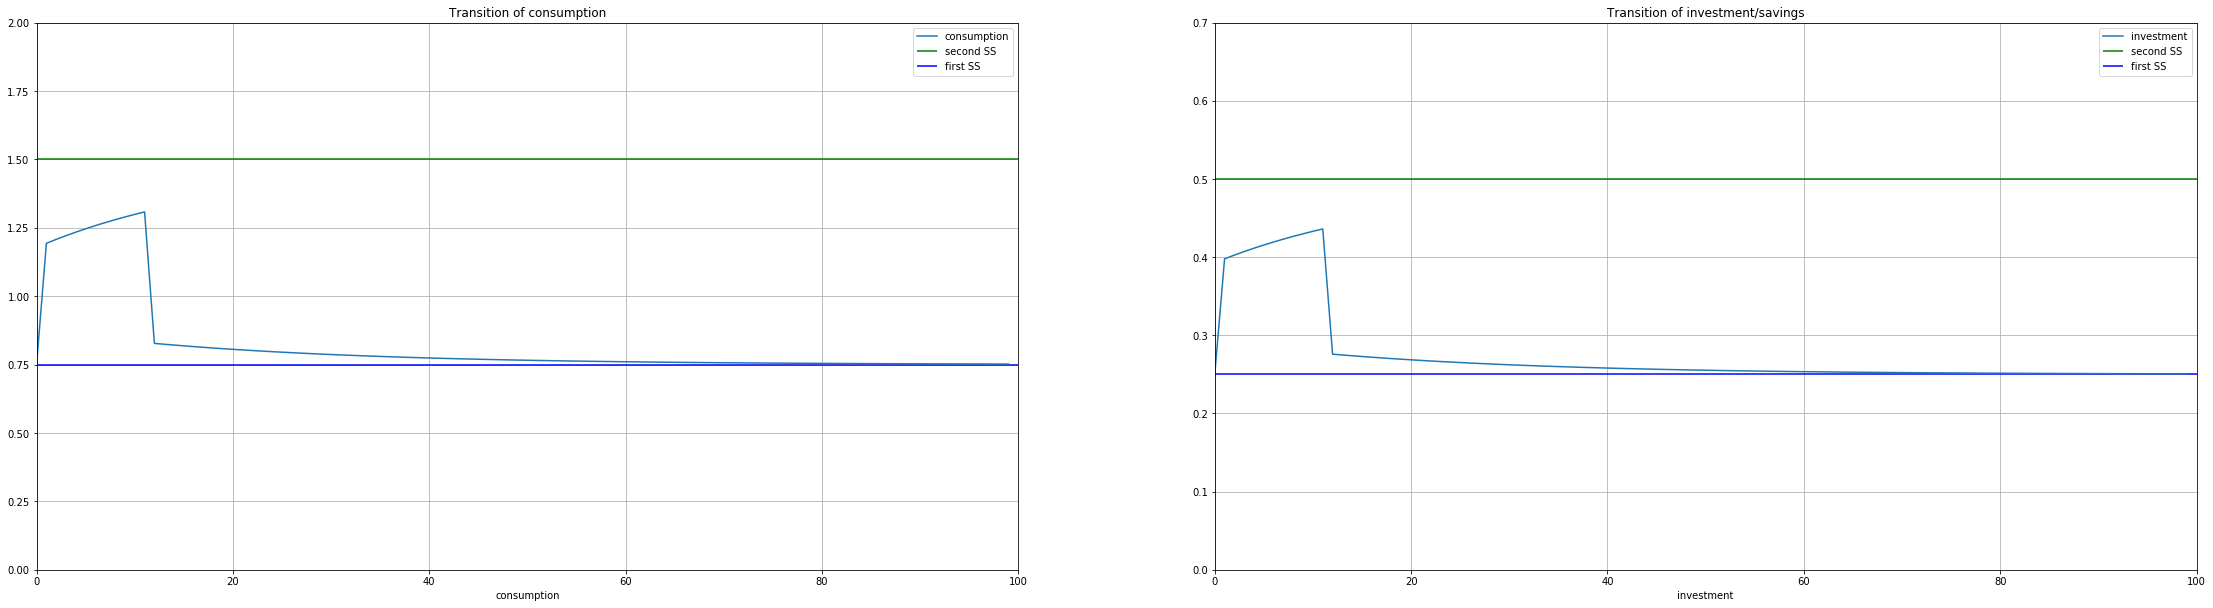

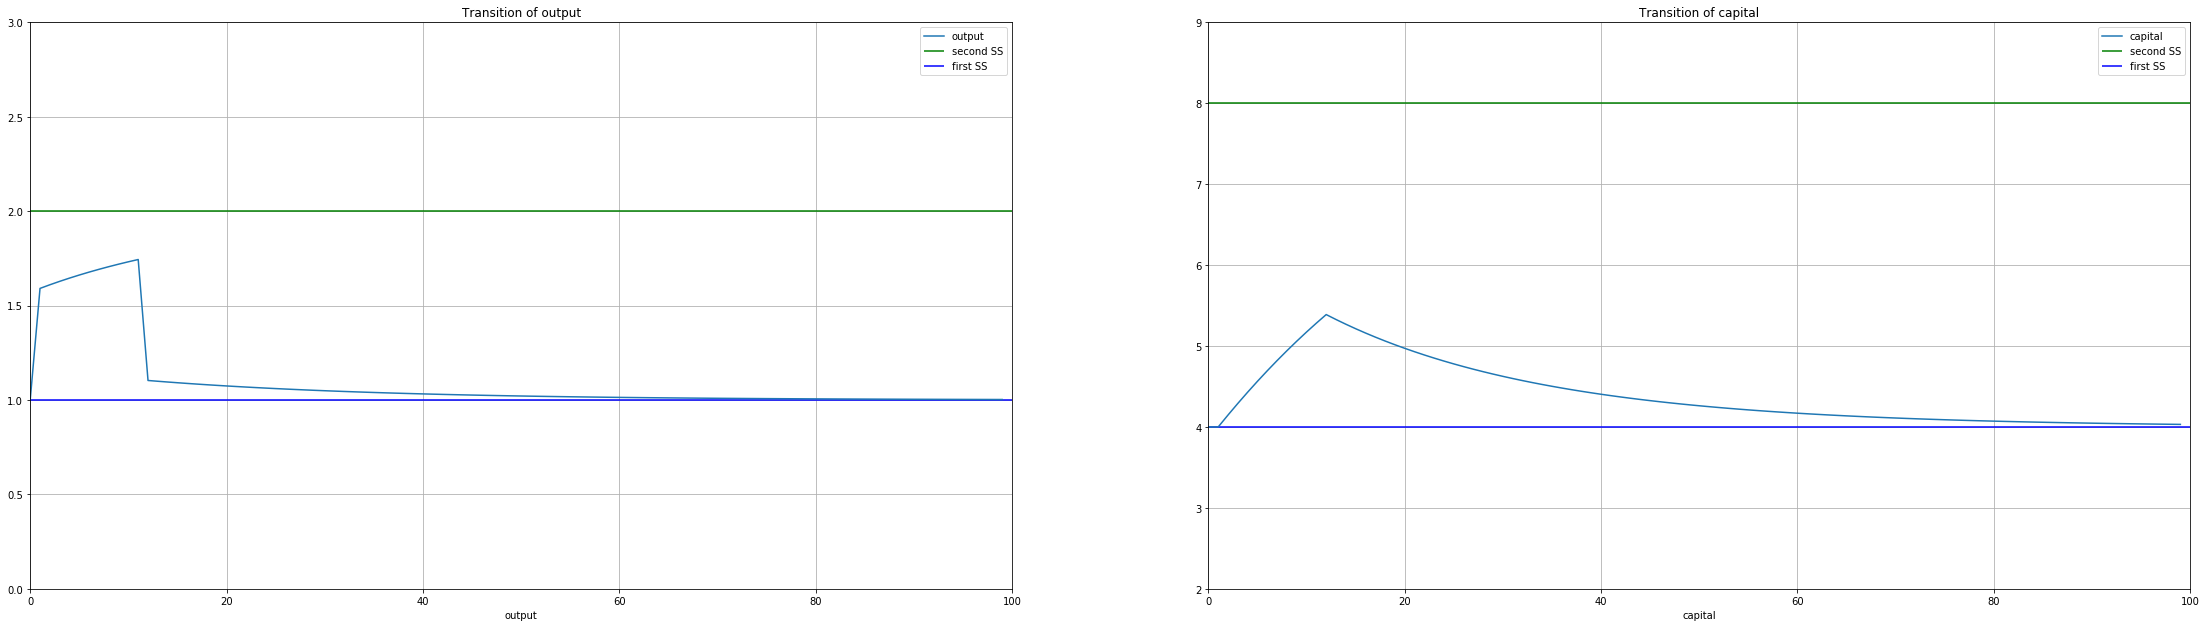

In [6]:
#Unexpected shocks. Let the agents believe productivity zt doubles once and for all periods.
# However, after 10 periods, surprise the economy by cutting the productivity zt back to its
# original value. Compute the transition for savings, consumption, labor and output.

import sympy as sy
import numpy as np
import math
import matplotlib.pyplot as plt

period=100
k = np.empty(period)
y = np.empty(period)
c = np.empty(period)
i = np.empty(period)

k[0] = k_ss1
y[0] = y_ss1
c[0] = c_ss1
i[0] = i_ss1

for t in range(period-1):
    print('period', t, 'K', k[t], 'Y', y[t], 'C', c[t], 'I',i[t])
    k[t+1] = y[t] - c[t] + (1-delta)*k[t]
    y[t+1] = (k[t+1]**(1-theta))*(z_new*h)**theta
    c[t+1] = 0.75* y[t+1]
    i[t+1] = y[t+1]-c[t+1]
    if t>=11:
        k[t+1] = y[t] - c[t] + (1-delta)*k[t]
        y[t+1] = k[t+1]**(1-theta)*(z*h)**theta
        c[t+1] = 0.75* y[t+1]
        i[t+1] = y[t+1]-c[t+1]
        

plt.figure(1)

plt.subplot(121)
t=range(period)
plt.plot(t,c,label='consumption')
plt.xlim([0,100])
plt.ylim([0,2])
plt.xlabel('time')
plt.xlabel('consumption')
plt.grid(True)
plt.title('Transition of consumption')
#plt.rcParams["figure.figsize"] = (2,1)
plt.hlines(c_ss2, 0, 100, colors='green', label = 'second SS')
plt.hlines(c_ss1, 0, 100, colors='blue', label = 'first SS')
plt.legend()

plt.subplot(122)
t=range(period)
plt.plot(t,i,label='investment')
plt.xlim([0,100])
plt.ylim([0,0.7])
plt.xlabel('time')
plt.xlabel('investment')
plt.grid(True)
plt.title('Transition of investment/savings')
plt.hlines(i_ss2, 0, 100, colors='green', label = 'second SS')
plt.hlines(i_ss1, 0, 100, colors='blue', label = 'first SS')
plt.legend()
plt.subplots_adjust(top=2, bottom=0.1, left=0, right=5, hspace=1, wspace=0.2)

plt.figure(2)

plt.subplot(221)
t=range(period)
plt.plot(t,y,label='output')
plt.xlim([0,100])
plt.ylim([0,3])
plt.xlabel('time')
plt.xlabel('output')
plt.grid(True)
plt.title('Transition of output')
#plt.rcParams["figure.figsize"] = (2,1)
plt.hlines(y_ss2, 0, 100, colors='green', label = 'second SS')
plt.hlines(y_ss1, 0, 100, colors='blue', label = 'first SS')
plt.legend()

plt.subplot(222)
t=range(period)
plt.plot(t,k,label='capital')
plt.xlim([0,100])
plt.ylim([2,9])
plt.xlabel('time')
plt.xlabel('capital')
plt.grid(True)
plt.title('Transition of capital')
plt.hlines(k_ss2, 0, 100, colors='green', label = 'second SS')
plt.hlines(k_ss1, 0, 100, colors='blue', label = 'first SS')
plt.legend()
plt.subplots_adjust(top=6, bottom=0.1, left=0, right=5, hspace=1, wspace=0.2)
    

## Consumption tax

In the first steady state
k_ss1 = 3.9999999999999964
y_ss1 = 0.9999999999999999
c_ss1 = 0.6749999999999999
i_ss1 = 0.24999999999999978
In the second steady state
k_ss2 = 7.99999999999999
y_ss2 = 1.9999999999999991
c_ss2 = 1.3499999999999994
i_ss2 = 0.4999999999999994
period 0 K 3.9999999999999964 Y 0.9999999999999999 C 0.6749999999999999 I 0.24999999999999978
period 1 K 4.074999999999997 Y 1.6008565315322631 C 1.2006423986491974 I 0.40021413288306573
period 2 K 4.220526632883063 Y 1.6195012697775726 C 1.2146259523331795 I 0.4048753174443931
period 3 K 4.361619035772264 Y 1.6371710284475998 C 1.2278782713356997 I 0.40929275711190005
period 4 K 4.498310603148398 Y 1.6539280588112246 C 1.2404460441084184 I 0.4134820147028062
period 5 K 4.630648205154429 Y 1.6698293497211403 C 1.2523720122908553 I 0.417457337430285
period 6 K 4.758690029762563 Y 1.6849272243293656 C 1.2636954182470241 I 0.42123180608234145
period 7 K 4.8825037089847445 Y 1.6992698505652044 C 1.2744523879239034 I 0.42481746

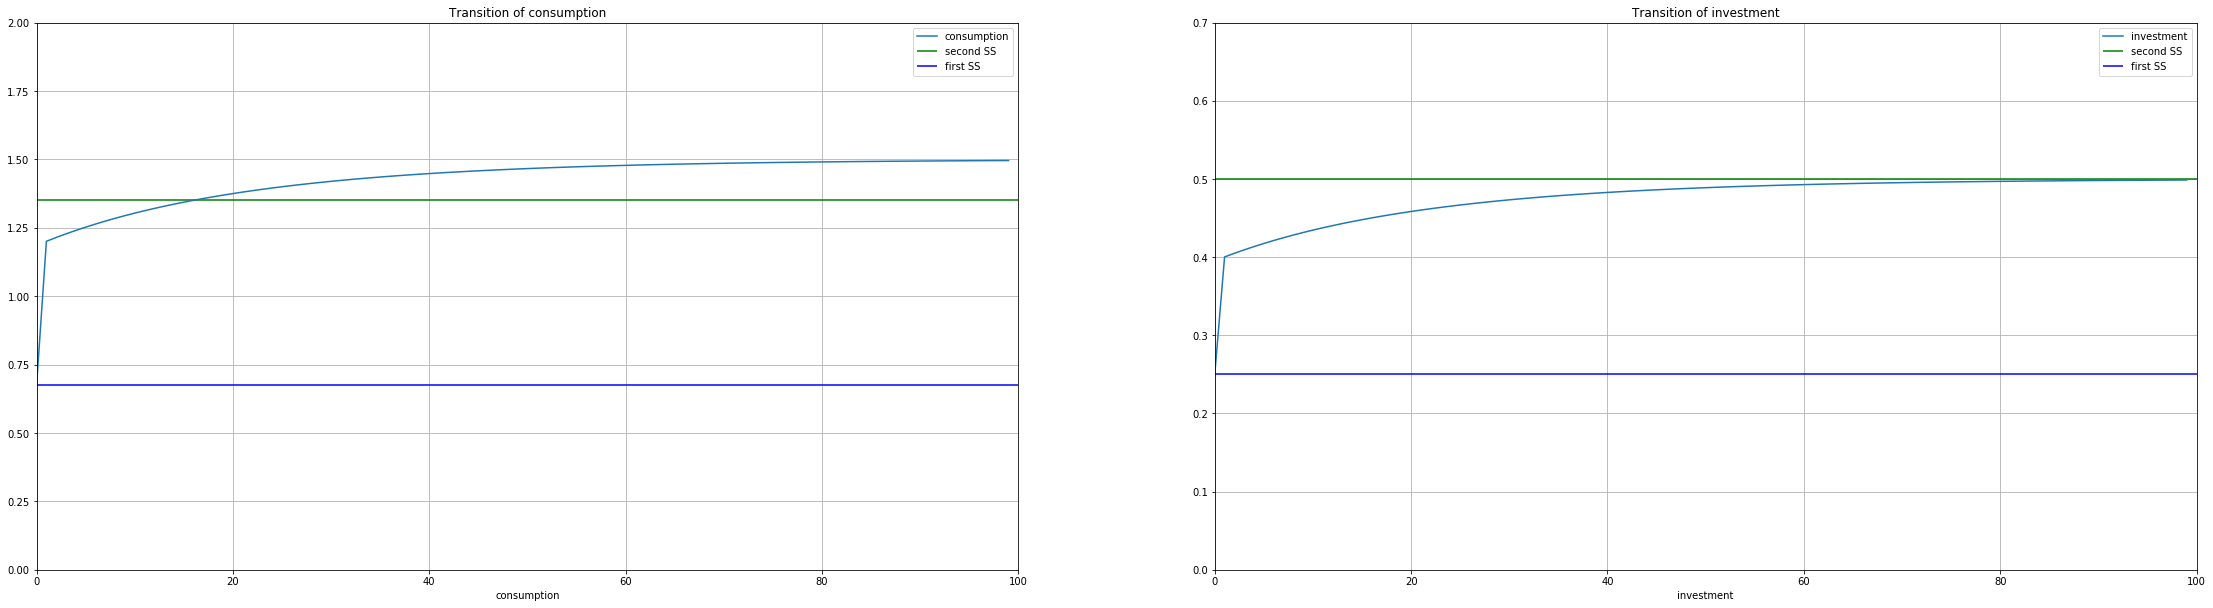

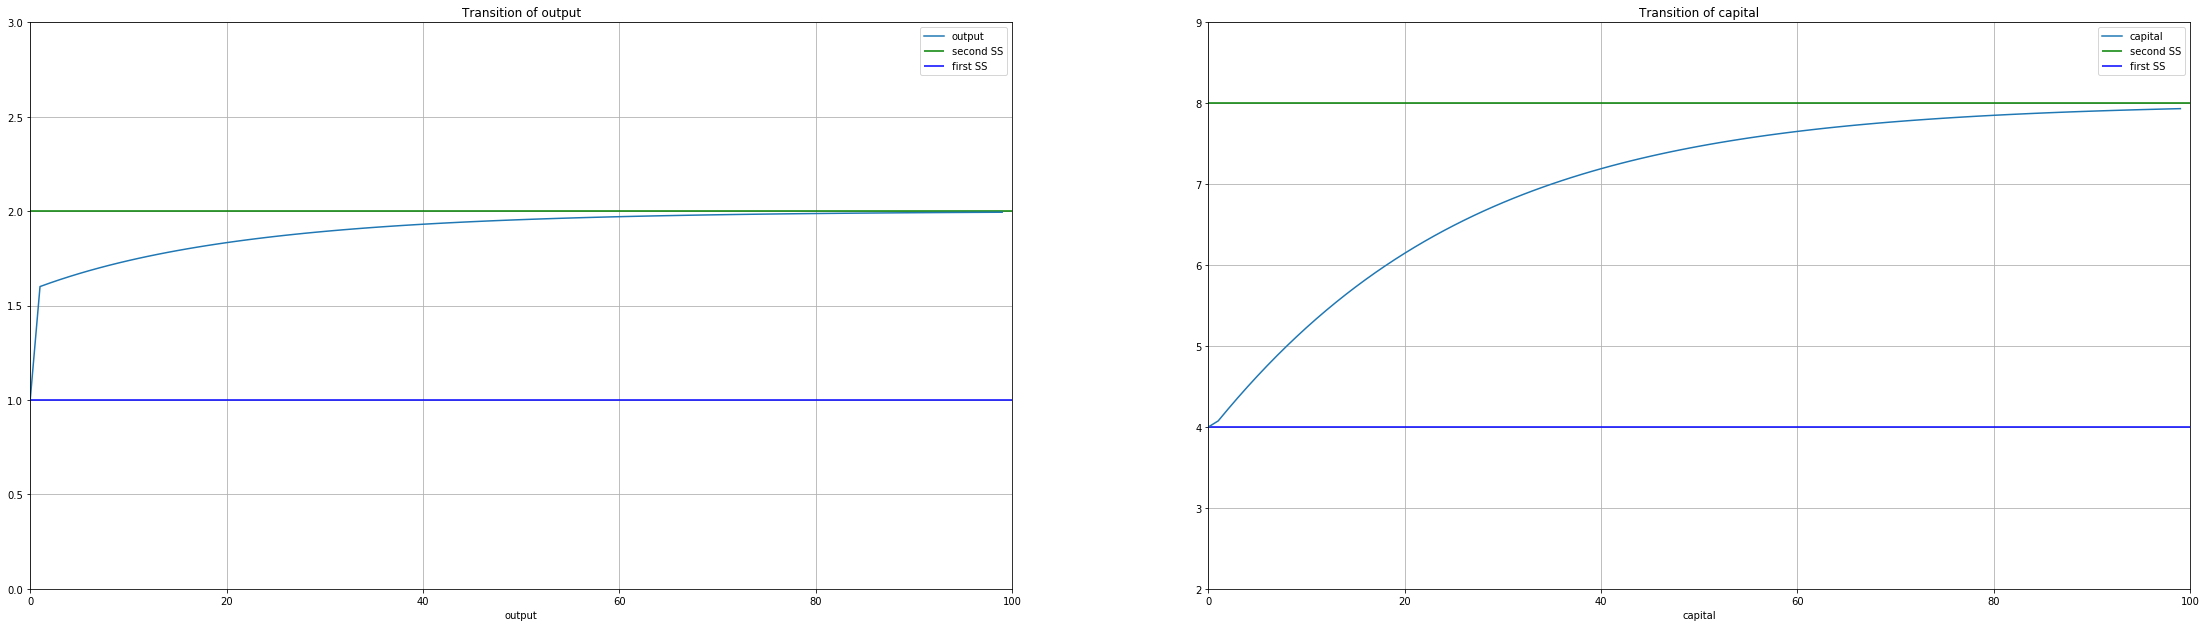

In [7]:
# Consumption tax
# let consumption tax be equal to 10%
ct = 0.1
theta = 0.67
h = 0.31
delta = 1/16
beta = 1/((1-theta)/4 +1 - delta)
z = ((1/beta - 1 + delta)/(1-theta))**((1-theta)/theta)*(1/h)

k_ss1 =((1-beta*(1-delta))/(beta*(1-theta)*(z*h)**theta))**(-1/theta)
y_ss1 = k_ss1**(1-theta)*(z*h)**theta
c_ss1 = 0.75*y_ss1*(1-ct)
i_ss1 = delta*k_ss1

print('In the first steady state')
print('k_ss1 =', k_ss1)
print('y_ss1 =', y_ss1)
print('c_ss1 =', c_ss1)
print('i_ss1 =', i_ss1)

z_new = 2*(((1/beta - 1 + delta)/(1-theta))**((1-theta)/theta)*(1/h))

k_ss2 =((1-beta*(1-delta))/(beta*(1-theta)*(z_new*h)**theta))**(-1/theta)
y_ss2 = k_ss2**(1-theta)*(z_new*h)**theta
c_ss2 = 0.75*y_ss2*(1-ct)
i_ss2 = delta*k_ss2

print('In the second steady state')
print('k_ss2 =', k_ss2)
print('y_ss2 =', y_ss2)
print('c_ss2 =', c_ss2)
print('i_ss2 =', i_ss2)

# Transition. Compute the transition from the first to the second steady state and report the time-path for savings, consumption, labor and output.
import sympy as sy
import numpy as np
import math
import matplotlib.pyplot as plt

period=100
k = np.empty(period)
y = np.empty(period)
c = np.empty(period)
i = np.empty(period)

k[0] = k_ss1
y[0] = y_ss1
c[0] = c_ss1
i[0] = i_ss1

for t in range(period-1):
    print('period', t, 'K', k[t], 'Y', y[t], 'C', c[t], 'I',i[t])
    k[t+1] = y[t] - c[t] + (1-delta)*k[t]
    #i[t+1] = k[t+2] - (1-delta)*k[t+1]
    y[t+1] = k[t+1]**(1-theta)*(z_new*h)**theta
    #c[t+1] = beta*c[t]*(1-delta+(1-theta)*k[t+1]**(-theta)*(z*h)**theta)
    #c[t+1] = y[t+1] - i[t+1]
    #c[t+1] = c[t]*beta*((1-theta)*y[t+1]/k[t+1]+1-delta)
    c[t+1] = 0.75* y[t+1]
    i[t+1] = y[t+1]-c[t+1]
    
plt.figure(1)

plt.subplot(121)
t=range(period)
plt.plot(t,c,label='consumption')
plt.xlim([0,100])
plt.ylim([0,2])
plt.xlabel('time')
plt.xlabel('consumption')
plt.grid(True)
plt.title('Transition of consumption')
#plt.rcParams["figure.figsize"] = (2,1)
plt.hlines(c_ss2, 0, 100, colors='green', label = 'second SS')
plt.hlines(c_ss1, 0, 100, colors='blue', label = 'first SS')
plt.legend()

plt.subplot(122)
t=range(period)
plt.plot(t,i,label='investment')
plt.xlim([0,100])
plt.ylim([0,0.7])
plt.xlabel('time')
plt.xlabel('investment')
plt.grid(True)
plt.title('Transition of investment')
plt.hlines(i_ss2, 0, 100, colors='green', label = 'second SS')
plt.hlines(i_ss1, 0, 100, colors='blue', label = 'first SS')
plt.legend()
plt.subplots_adjust(top=2, bottom=0.1, left=0, right=5, hspace=1, wspace=0.2)

plt.figure(2)

plt.subplot(221)
t=range(period)
plt.plot(t,y,label='output')
plt.xlim([0,100])
plt.ylim([0,3])
plt.xlabel('time')
plt.xlabel('output')
plt.grid(True)
plt.title('Transition of output')
#plt.rcParams["figure.figsize"] = (2,1)
plt.hlines(y_ss2, 0, 100, colors='green', label = 'second SS')
plt.hlines(y_ss1, 0, 100, colors='blue', label = 'first SS')
plt.legend()

plt.subplot(222)
t=range(period)
plt.plot(t,k,label='capital')
plt.xlim([0,100])
plt.ylim([2,9])
plt.xlabel('time')
plt.xlabel('capital')
plt.grid(True)
plt.title('Transition of capital')
plt.hlines(k_ss2, 0, 100, colors='green', label = 'second SS')
plt.hlines(k_ss1, 0, 100, colors='blue', label = 'first SS')
plt.legend()
plt.subplots_adjust(top=6, bottom=0.1, left=0, right=5, hspace=1, wspace=0.2)
    

## Capital tax

In the first steady state
k_ss1 = 3.9999999999999964
y_ss1 = 0.4677351412871982
c_ss1 = 0.04273514128719852
i_ss1 = 0.02499999999999998
In the second steady state
k_ss2 = 7.99999999999999
y_ss2 = 0.935470282574396
c_ss2 = 0.08547028257439704
i_ss2 = 0.04999999999999994
period 0 K 3.9999999999999964 Y 0.4677351412871982 C 0.04273514128719852 I 0.02499999999999998
period 1 K 4.174999999999996 Y 1.6137153803776723 C 1.2102865352832541 I 0.4034288450944181
period 2 K 4.317491345094415 Y 1.6316863744014276 C 1.2237647808010708 I 0.40792159360035685
period 3 K 4.4555697296263705 Y 1.6487255596997186 C 1.236544169774789 I 0.4121813899249296
period 4 K 4.589278011449652 Y 1.6648915197276193 C 1.2486686397957145 I 0.41622287993190477
period 5 K 4.7186710156659535 Y 1.6802379937221155 C 1.2601784952915867 I 0.4200594984305288
period 6 K 4.843813575617361 Y 1.6948144126602018 C 1.2711108094951513 I 0.4237036031650505
period 7 K 4.964778830306326 Y 1.7086663595816616 C 1.2814997696862462 I 0.42716

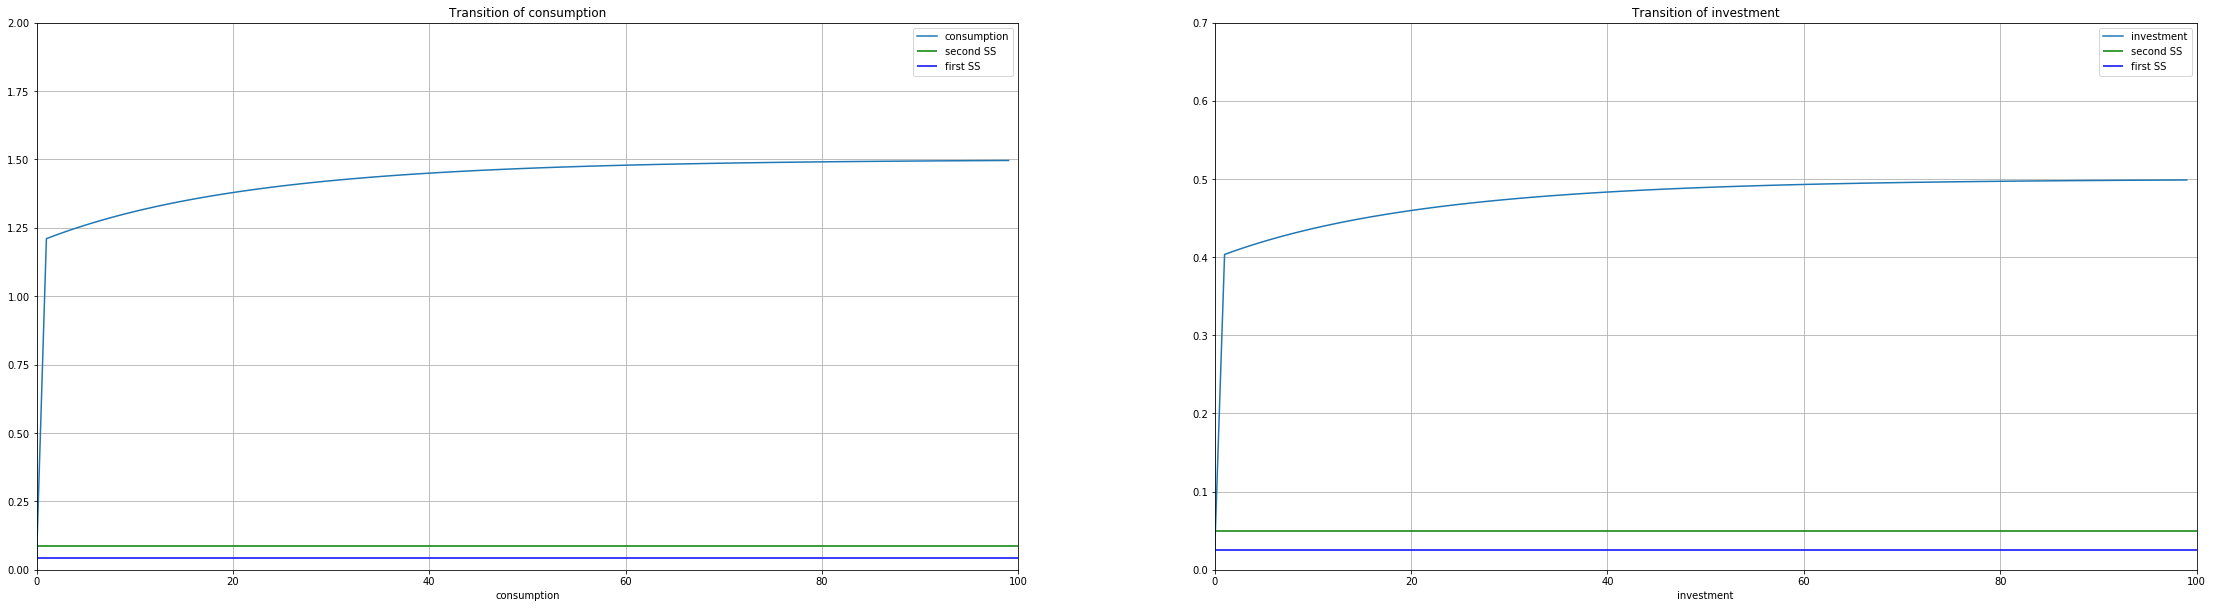

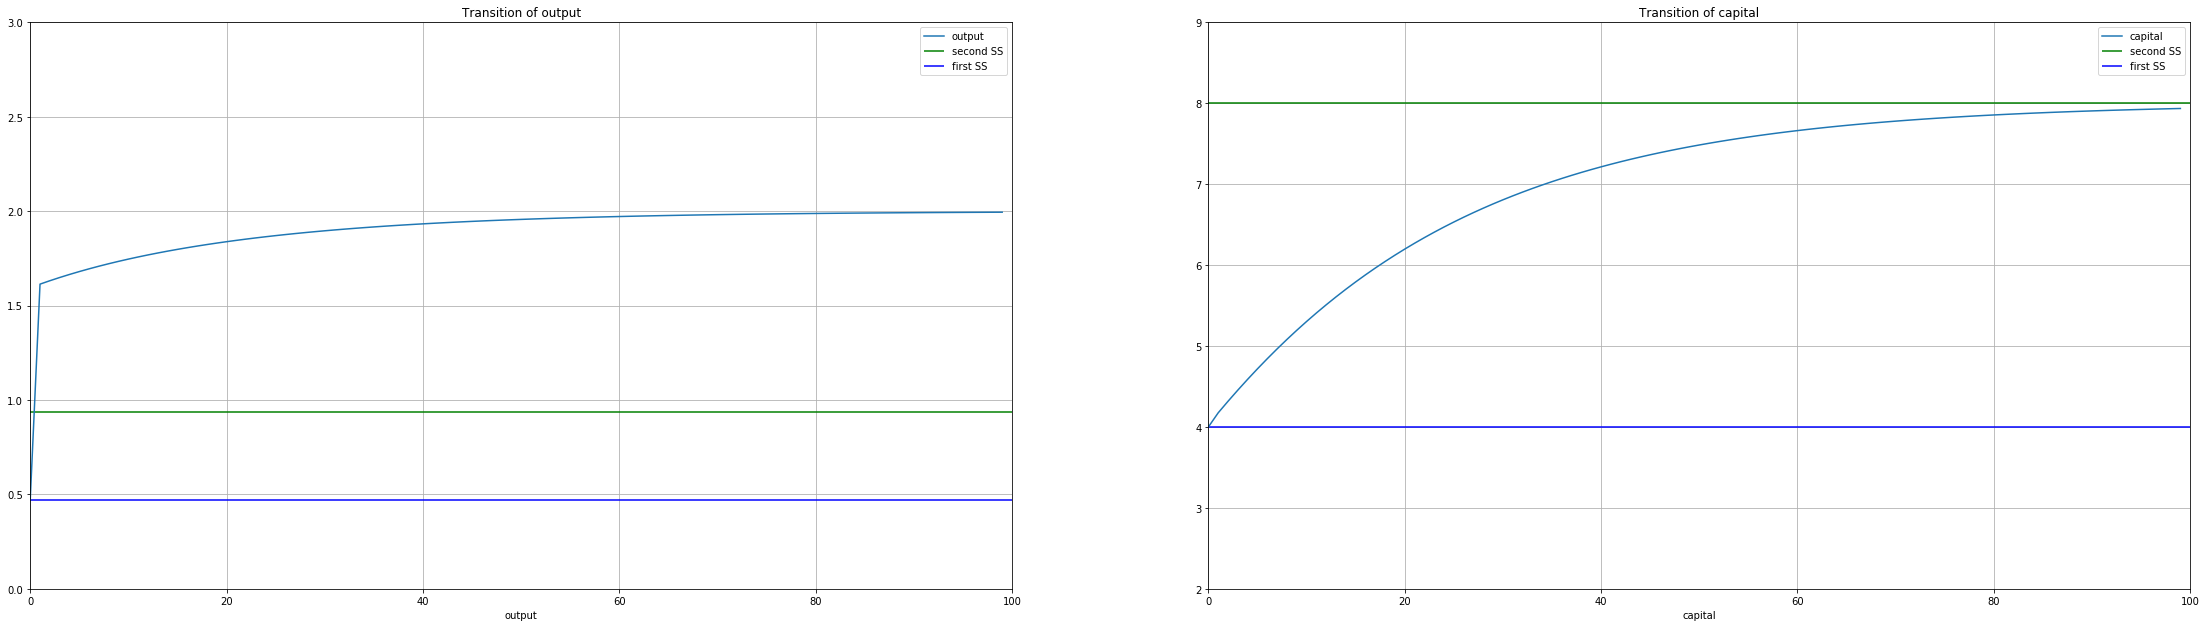

In [8]:
# Capital tax
# let consumption tax be equal to 10%
kt = 0.1
theta = 0.67
h = 0.31
delta = 1/16
beta = 1/((1-theta)/4 +1 - delta)
z = ((1/beta - 1 + delta)/(1-theta))**((1-theta)/theta)*(1/h)

k_ss1 =((1-beta*(1-delta))/(beta*(1-theta)*(z*h)**theta))**(-1/theta)
k_taxed1 = k_ss1*kt
y_ss1 = k_taxed1**(1-theta)*(z*h)**theta
i_ss1 = delta*k_taxed1
c_ss1 = y_ss1 - i_ss1 - k_taxed1


print('In the first steady state')
print('k_ss1 =', k_ss1)
print('y_ss1 =', y_ss1)
print('c_ss1 =', c_ss1)
print('i_ss1 =', i_ss1)

z_new = 2*(((1/beta - 1 + delta)/(1-theta))**((1-theta)/theta)*(1/h))

k_ss2 =((1-beta*(1-delta))/(beta*(1-theta)*(z_new*h)**theta))**(-1/theta)
k_taxed2 = k_ss2*kt
y_ss2 = k_taxed2**(1-theta)*(z_new*h)**theta
i_ss2 = delta*k_taxed2
c_ss2 = y_ss2 - i_ss2 - k_taxed2

print('In the second steady state')
print('k_ss2 =', k_ss2)
print('y_ss2 =', y_ss2)
print('c_ss2 =', c_ss2)
print('i_ss2 =', i_ss2)

# Transition. Compute the transition from the first to the second steady state and report the time-path for savings, consumption, labor and output.
import sympy as sy
import numpy as np
import math
import matplotlib.pyplot as plt

period=100
k = np.empty(period)
y = np.empty(period)
c = np.empty(period)
i = np.empty(period)

k[0] = k_ss1
y[0] = y_ss1
c[0] = c_ss1
i[0] = i_ss1

for t in range(period-1):
    print('period', t, 'K', k[t], 'Y', y[t], 'C', c[t], 'I',i[t])
    k[t+1] = y[t] - c[t] + (1-delta)*k[t]
    #i[t+1] = k[t+2] - (1-delta)*k[t+1]
    y[t+1] = k[t+1]**(1-theta)*(z_new*h)**theta
    #c[t+1] = beta*c[t]*(1-delta+(1-theta)*k[t+1]**(-theta)*(z*h)**theta)
    #c[t+1] = y[t+1] - i[t+1]
    #c[t+1] = c[t]*beta*((1-theta)*y[t+1]/k[t+1]+1-delta)
    c[t+1] = 0.75* y[t+1]
    i[t+1] = y[t+1]-c[t+1]
    
plt.figure(1)

plt.subplot(121)
t=range(period)
plt.plot(t,c,label='consumption')
plt.xlim([0,100])
plt.ylim([0,2])
plt.xlabel('time')
plt.xlabel('consumption')
plt.grid(True)
plt.title('Transition of consumption')
#plt.rcParams["figure.figsize"] = (2,1)
plt.hlines(c_ss2, 0, 100, colors='green', label = 'second SS')
plt.hlines(c_ss1, 0, 100, colors='blue', label = 'first SS')
plt.legend()

plt.subplot(122)
t=range(period)
plt.plot(t,i,label='investment')
plt.xlim([0,100])
plt.ylim([0,0.7])
plt.xlabel('time')
plt.xlabel('investment')
plt.grid(True)
plt.title('Transition of investment')
plt.hlines(i_ss2, 0, 100, colors='green', label = 'second SS')
plt.hlines(i_ss1, 0, 100, colors='blue', label = 'first SS')
plt.legend()
plt.subplots_adjust(top=2, bottom=0.1, left=0, right=5, hspace=1, wspace=0.2)

plt.figure(2)

plt.subplot(221)
t=range(period)
plt.plot(t,y,label='output')
plt.xlim([0,100])
plt.ylim([0,3])
plt.xlabel('time')
plt.xlabel('output')
plt.grid(True)
plt.title('Transition of output')
#plt.rcParams["figure.figsize"] = (2,1)
plt.hlines(y_ss2, 0, 100, colors='green', label = 'second SS')
plt.hlines(y_ss1, 0, 100, colors='blue', label = 'first SS')
plt.legend()

plt.subplot(222)
t=range(period)
plt.plot(t,k,label='capital')
plt.xlim([0,100])
plt.ylim([2,9])
plt.xlabel('time')
plt.xlabel('capital')
plt.grid(True)
plt.title('Transition of capital')
plt.hlines(k_ss2, 0, 100, colors='green', label = 'second SS')
plt.hlines(k_ss1, 0, 100, colors='blue', label = 'first SS')
plt.legend()
plt.subplots_adjust(top=6, bottom=0.1, left=0, right=5, hspace=1, wspace=0.2)

# Question 2. General Equilibrium with Labor Supply, Uncertainty, and Progressive Labor Income Tax

To solve this model: plug the budget constraint in the maximization problem. Take FOCs and we have:
$\frac {\partial U}{\partial c} = - c^{-\sigma} - \beta [(1-t)wh' + (1+r)((1-t)wh +y_0 + T_1 - c)]^{-\sigma} = 0 $
$\frac {\partial U}{\partial h} = - \kappa h^{1/v} + \beta [(1-t)wE_0 [h'] + (1+r)((1-t)wh +y_0 + T_1 - c)]^{-\sigma}(1+r)(1-t)w = 0 $
$\frac {\partial U}{\partial h'} = -\beta \kappa E_0 [h']^{1/v} + \beta [(1-t)wE_0 [h'] + (1+r)((1-t)wh +y_0 + T_1 - c)]^{-\sigma}(1-t)w = 0 $


So we have:

$ E_0 [h'] = h[\beta (1+r)]^{-v} $

$ c= (\frac{\kappa}{w})^{\frac{-1}{\sigma}}h^{\frac{-1}{v\sigma}}$

## [1] Case without taxes

In [9]:
# in cooperation with Mridula and Pau
import numpy as np
from numpy import *
from scipy.optimize import *
from itertools import product
import matplotlib.pyplot as plt

random.seed(10)
#DISTRIBUTION OBJECT
eta=[1, 1.5, 2.5, 3]
eps=np.random.choice([-0.05,0.05],size=100,p=[0.5,0.5])
eps = np.array(eps)
y0 = np.random.uniform(0.001,0.009,100)
for (i, item) in enumerate(y0):
    if 0.0055<item<0.0087:
        y0[i] = 0.001
y0=np.asarray(y0)
eps=np.random.choice([-0.05,0.05],size=100,p=[0.5,0.5])
eps =np.array(eps)
Distri= list (product(eta,y0))

# SYSTEM OF EQUATIONS

# Solvem the system of equations for a specific rate of return and eta=1
solution1=[]
for i in y0:
    for k in eps: 
        def GE(x):
            eta=1
            r=0.65625
            sigma=3
            kappa=4
            nu=4
            beta=0.99
            tau=0
            T0=0
            T1=0
            a = x[0]
            h0 = x[1]
            h1 = x[2]
            lamda = x[3]
            c0 = x[4]
            c1 = x[5]


            F = empty((6))
            F[0]= np.power((1-tau)*eta*h0 + i + T0 -a, -sigma)*(1-tau)*eta - kappa*np.power(h0,1/nu)
            F[1]= beta*np.power((((1-tau)*eta*h1)+(1+r)*a + T1), -sigma)*(1-tau)*eta - kappa*np.power(h1,1/nu)
            F[2]= beta*(np.power(((1-tau)*eta*h1)+(1+r)*a + T1,-sigma)*(1+r)) - lamda - np.power((1-tau)*eta*h0 + i + T0 -a, -sigma)
            F[3]= ((1-tau)*eta*h0 + i + T0 -a) + (1/(1+r))*((1-tau)*(eta+k)*h1 + (1+r)*a + T1) - i - (1+r)*(eta+k)*h1
            F[4]= (1-tau)*eta*h0 +i + T0 -a -c0
            F[5]= (1-tau)*(eta+k)*h1 + (1+r)*a + T1 - c1
            return F

    xGuess= np.array([0.05,0.1,0.1, 0.6, 0.8,0.95])
    x = fsolve(GE, xGuess) 

    solution1.append(x)
    sol_mat=np.matrix(solution1)

assets_1=sol_mat[:,0]
c0_1=sol_mat[:,4]
c1_1=sol_mat[:,5]
h0_1=sol_mat[:,1]
h1_1=sol_mat[:,2]
sum(assets_1)

0.0007024643319665834

In [10]:
#eta =1.5
solution15=[]
for i in y0:
    for k in eps: 
        def GE(x):
            eta=1.5
            r=0.645
            sigma=3
            kappa=4
            nu=4
            beta=0.99
            tau=0
            T0=0
            T1=0
            a = x[0]
            h0 = x[1]
            h1 = x[2]
            lamda = x[3]
            c0 = x[4]
            c1 = x[5]


            F = empty((6))
            F[0]= np.power((1-tau)*eta*h0 + i + T0 -a, -sigma)*(1-tau)*eta - kappa*np.power(h0,1/nu)
            F[1]= beta*np.power((((1-tau)*eta*h1)+(1+r)*a + T1), -sigma)*(1-tau)*eta - kappa*np.power(h1,1/nu)
            F[2]= beta*(np.power(((1-tau)*eta*h1)+(1+r)*a + T1,-sigma)*(1+r)) - lamda - np.power((1-tau)*eta*h0 + i + T0 -a, -sigma)
            F[3]= ((1-tau)*eta*h0 + i + T0 -a) + (1/(1+r))*((1-tau)*(eta+k)*h1 + (1+r)*a + T1) - i - (1+r)*(eta+k)*h1
            F[4]= (1-tau)*eta*h0 +i + T0 -a -c0
            F[5]= (1-tau)*(eta+k)*h1 + (1+r)*a + T1 - c1
            return F

    xGuess= np.array([0.05,0.1,0.1, 0.6, 0.8,0.95])
    x = fsolve(GE, xGuess) 

    solution15.append(x)
    sol_mat=np.matrix(solution15)

assets_15=sol_mat[:,0]
c0_15=sol_mat[:,4]
c1_15=sol_mat[:,5]
h0_15=sol_mat[:,1]
h1_15=sol_mat[:,2]
sum(assets_15)

0.06933264356708829

In [11]:
solution25=[]
for i in y0:
    for k in eps: 
        def GE(x):
            eta=2.5
            r=0.634
            sigma=3
            kappa=4
            nu=4
            beta=0.99
            tau=0
            T0=0
            T1=0
            a = x[0]
            h0 = x[1]
            h1 = x[2]
            lamda = x[3]
            c0 = x[4]
            c1 = x[5]


            F = empty((6))
            F[0]= np.power((1-tau)*eta*h0 + i + T0 -a, -sigma)*(1-tau)*eta - kappa*np.power(h0,1/nu)
            F[1]= beta*np.power((((1-tau)*eta*h1)+(1+r)*a + T1), -sigma)*(1-tau)*eta - kappa*np.power(h1,1/nu)
            F[2]= beta*(np.power(((1-tau)*eta*h1)+(1+r)*a + T1,-sigma)*(1+r)) - lamda - np.power((1-tau)*eta*h0 + i + T0 -a, -sigma)
            F[3]= ((1-tau)*eta*h0 + i + T0 -a) + (1/(1+r))*((1-tau)*(eta+k)*h1 + (1+r)*a + T1) - i - (1+r)*(eta+k)*h1
            F[4]= (1-tau)*eta*h0 +i + T0 -a -c0
            F[5]= (1-tau)*(eta+k)*h1 + (1+r)*a + T1 - c1
            return F

    xGuess= np.array([0.05,0.1,0.1, 0.6, 0.8,0.95])
    x = fsolve(GE, xGuess) 

    solution25.append(x)
    sol_mat=np.matrix(solution25)

assets_25=sol_mat[:,0]
c0_25=sol_mat[:,4]
c1_25=sol_mat[:,5]
h0_25=sol_mat[:,1]
h1_25=sol_mat[:,2]
sum(assets_25)

0.029183187167473007

In [12]:
solution3=[]
for i in y0:
    for k in eps: 
        def GE(x):
            eta=3
            r=0.64
            sigma=3
            kappa=4
            nu=4
            beta=0.99
            tau=0
            T0=0
            T1=0
            a = x[0]
            h0 = x[1]
            h1 = x[2]
            lamda = x[3]
            c0 = x[4]
            c1 = x[5]


            F = empty((6))
            F[0]= np.power((1-tau)*eta*h0 + i + T0 -a, -sigma)*(1-tau)*eta - kappa*np.power(h0,1/nu)
            F[1]= beta*np.power((((1-tau)*eta*h1)+(1+r)*a + T1), -sigma)*(1-tau)*eta - kappa*np.power(h1,1/nu)
            F[2]= beta*(np.power(((1-tau)*eta*h1)+(1+r)*a + T1,-sigma)*(1+r)) - lamda - np.power((1-tau)*eta*h0 + i + T0 -a, -sigma)
            F[3]= ((1-tau)*eta*h0 + i + T0 -a) + (1/(1+r))*((1-tau)*(eta+k)*h1 + (1+r)*a + T1) - i - (1+r)*(eta+k)*h1
            F[4]= (1-tau)*eta*h0 +i + T0 -a -c0
            F[5]= (1-tau)*(eta+k)*h1 + (1+r)*a + T1 - c1
            return F

    xGuess= np.array([0.05,0.1,0.1, 0.6, 0.8,0.95])
    x = fsolve(GE, xGuess) 

    solution3.append(x)
    sol_mat=np.matrix(solution3)

assets_3=sol_mat[:,0]
c0_3=sol_mat[:,4]
c1_3=sol_mat[:,5]
h0_3=sol_mat[:,1]
h1_3=sol_mat[:,2]
sum(assets_3)

0.4899388948189489

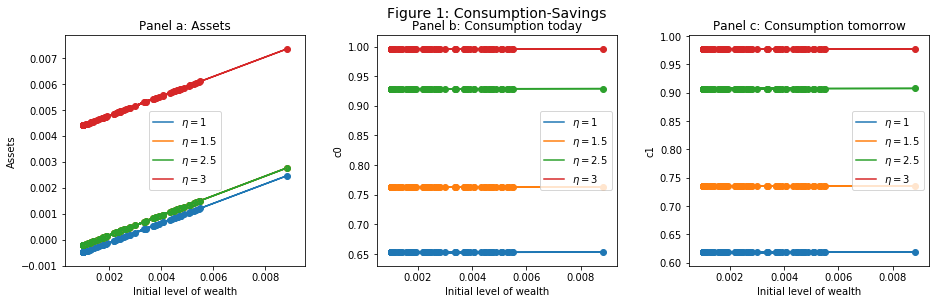

In [13]:
#PLOT
#PLOT
# Convert every output in an array
y0=np.asarray(y0)
assets_1=np.asarray(assets_1)
assets_15=np.asarray(assets_25)
assets_25=np.asarray(assets_25)
assets_3=np.asarray(assets_3)
c0_1=np.asarray(c0_1)
c0_15=np.asarray(c0_15)
c0_25=np.asarray(c0_25)
c0_3=np.asarray(c0_3)
c1_1=np.asarray (c1_1)
c1_15=np.asarray (c1_15)
c1_25=np.asarray (c1_25)
c1_3=np.asarray (c1_3)
h0_1=np.asarray(h0_1)
h0_15=np.asarray(h0_15)
h0_25=np.asarray(h0_25)
h0_3=np.asarray(h0_3)
h1_1=np.asarray(h1_1)
h1_15=np.asarray(h1_15)
h1_25=np.asarray(h1_25)
h1_3=np.asarray(h1_3)

plt.figure(1)
plt.suptitle('Figure 1: Consumption-Savings', x=1, y=1, fontsize=14)

plt.subplot(131)
plt.plot(y0, assets_1, label='$\eta=1$')
plt.plot(y0, assets_15, label='$\eta=1.5$')
plt.plot(y0, assets_25, label='$\eta=2.5$')
plt.plot(y0, assets_3, label='$\eta=3$')
plt.scatter(y0,assets_1)
plt.scatter(y0,assets_15)
plt.scatter(y0,assets_25)
plt.scatter(y0,assets_3)
plt.xlabel('Initial level of wealth')
plt.ylabel('Assets')
plt.title('Panel a: Assets')
plt.legend()
plt.subplots_adjust(top=0.9, bottom=0.1, left=0, right=2, hspace=0.5, wspace=0.3)

plt.subplot(132)
plt.plot(y0, c0_1, label='$\eta=1$')
plt.plot(y0, c0_15, label='$\eta=1.5$')
plt.plot(y0, c0_25, label='$\eta=2.5$')
plt.plot(y0, c0_3, label='$\eta=3$')
plt.scatter(y0,c0_1)
plt.scatter(y0,c0_15)
plt.scatter(y0,c0_25)
plt.scatter(y0,c0_3)
plt.xlabel('Initial level of wealth')
plt.ylabel('c0')
plt.title('Panel b: Consumption today')
plt.legend()
plt.subplots_adjust(top=0.9, bottom=0.1, left=0, right=2, hspace=0.5, wspace=0.3)

plt.subplot(133)
plt.plot(y0, c1_1, label='$\eta=1$')
plt.plot(y0, c1_15, label='$\eta=1.5$')
plt.plot(y0, c1_25, label='$\eta=2.5$')
plt.plot(y0, c1_3, label='$\eta=3$')
plt.scatter(y0,c1_1)
plt.scatter(y0,c1_15)
plt.scatter(y0,c1_25)
plt.scatter(y0,c1_3)
plt.xlabel('Initial level of wealth')
plt.ylabel('c1')
plt.title('Panel c: Consumption tomorrow')
plt.legend()
plt.subplots_adjust(top=0.9, bottom=0.1, left=0, right=2, hspace=0.5, wspace=0.3)
             
plt.subplots_adjust(top=0.9, bottom=0.1, left=0, right=2, hspace=0.5, wspace=0.3)

### For any value of eta , levels of consumption today and tomorrow remain the same for all the groups of the popultaion. The higher the value of eta, the higher level of consumption in both periods.

## SAVINGS RATE

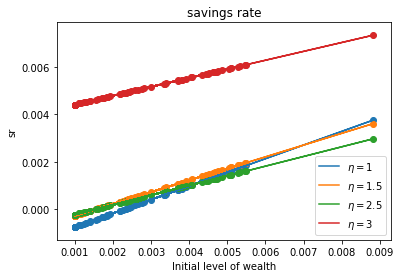

In [16]:
#SAVINGS RATE
#eta=1
savings_1=[]
for i in range(0,100) :
    eta=1
    s_1 = assets_1[i]/(y0[i]+eta*h0_1[i])
    savings_1.append(s_1)

savings_15=[]
for i in range(0,100) :
    eta=1.5
    s_15 = assets_15[i]/(y0[i]+eta*h0_15[i])
    savings_15.append(s_15)

savings_25=[]
for i in range(0,100) :
    eta=2.5
    s_25 = assets_25[i]/(y0[i]+eta*h0_25[i])
    savings_25.append(s_25)
    
savings_3=[]
for i in range(0,100) :
    eta=3
    s_3 = assets_3[i]/(y0[i]+eta*h0_3[i])
    savings_3.append(s_3)
    
plt.figure(1)
plt.plot(y0, savings_1, label='$\eta=1$')
plt.plot(y0, savings_15, label='$\eta=1.5$')
plt.plot(y0,savings_25, label='$\eta=2.5$')
plt.plot(y0, savings_3, label='$\eta=3$')
plt.scatter(y0,savings_1)
plt.scatter(y0,savings_15)
plt.scatter(y0,savings_25)
plt.scatter(y0,savings_3)
plt.xlabel('Initial level of wealth')
plt.ylabel('sr')
plt.title('savings rate')
plt.legend()

### For the savings rate we can see that richer population have higher savings rate. What is interesting thhat slopes change deoending on the value of eta. The most smooth slope is for eta = 3, whereas for the lowest value of eta=1 , the difference in savings rate between poor and rich is the largest.

## HOURS WORKED

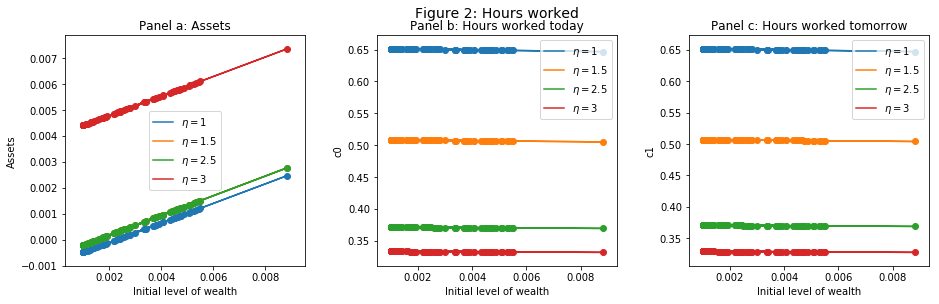

In [205]:
# HOURS WORKED
#PLOT
#PLOT
# Convert every output in an array
y0=np.asarray(y0)
assets_1=np.asarray(assets_1)
assets_15=np.asarray(assets_25)
assets_25=np.asarray(assets_25)
assets_3=np.asarray(assets_3)
c0_1=np.asarray(c0_1)
c0_15=np.asarray(c0_15)
c0_25=np.asarray(c0_25)
c0_3=np.asarray(c0_3)
c1_1=np.asarray (c1_1)
c1_15=np.asarray (c1_15)
c1_25=np.asarray (c1_25)
c1_3=np.asarray (c1_3)
h0_1=np.asarray(h0_1)
h0_15=np.asarray(h0_15)
h0_25=np.asarray(h0_25)
h0_3=np.asarray(h0_3)
h1_1=np.asarray(h1_1)
h1_15=np.asarray(h1_15)
h1_25=np.asarray(h1_25)
h1_3=np.asarray(h1_3)

plt.figure(1)
plt.suptitle('Figure 2: Hours worked', x=1, y=1, fontsize=14)

plt.subplot(131)
plt.plot(y0, assets_1, label='$\eta=1$')
plt.plot(y0, assets_15, label='$\eta=1.5$')
plt.plot(y0, assets_25, label='$\eta=2.5$')
plt.plot(y0, assets_3, label='$\eta=3$')
plt.scatter(y0,assets_1)
plt.scatter(y0,assets_15)
plt.scatter(y0,assets_25)
plt.scatter(y0,assets_3)
plt.xlabel('Initial level of wealth')
plt.ylabel('Assets')
plt.title('Panel a: Assets')
plt.legend()
plt.subplots_adjust(top=0.9, bottom=0.1, left=0, right=2, hspace=0.5, wspace=0.3)

plt.subplot(132)
plt.plot(y0, h0_1, label='$\eta=1$')
plt.plot(y0, h0_15, label='$\eta=1.5$')
plt.plot(y0, h0_25, label='$\eta=2.5$')
plt.plot(y0, h0_3, label='$\eta=3$')
plt.scatter(y0,h0_1)
plt.scatter(y0,h0_15)
plt.scatter(y0,h0_25)
plt.scatter(y0,h0_3)
plt.xlabel('Initial level of wealth')
plt.ylabel('c0')
plt.title('Panel b: Hours worked today')
plt.legend()
plt.subplots_adjust(top=0.9, bottom=0.1, left=0, right=2, hspace=0.5, wspace=0.3)

plt.subplot(133)
plt.plot(y0, h1_1, label='$\eta=1$')
plt.plot(y0, h1_15, label='$\eta=1.5$')
plt.plot(y0, h1_25, label='$\eta=2.5$')
plt.plot(y0, h1_3, label='$\eta=3$')
plt.scatter(y0,h1_1)
plt.scatter(y0,h1_15)
plt.scatter(y0,h1_25)
plt.scatter(y0,h1_3)
plt.xlabel('Initial level of wealth')
plt.ylabel('c1')
plt.title('Panel c: Hours worked tomorrow')
plt.legend()
plt.subplots_adjust(top=0.9, bottom=0.1, left=0, right=2, hspace=0.5, wspace=0.3)
             
plt.subplots_adjust(top=0.9, bottom=0.1, left=0, right=2, hspace=0.5, wspace=0.3)

## LABOR INCOME

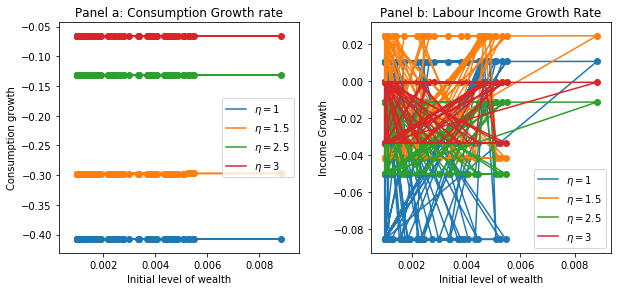

In [80]:
#Consumption Growth
#eta=1
cg1=[]
for i in range(0,100) :
    c1 = c1_1[i] - c0_1[i]/c0_1[i]
    cg1.append(c1)

#eta=1.5
cg2=[]
for i in range(0,100) :
    c2 = c1_15[i] - c0_15[i]/c0_15[i]
    cg2.append(c2)

#eta=2.5
cg3=[]
for i in range(0,100) :
    c3 = c1_25[i] - c0_25[i]/c0_25[i]
    cg3.append(c3)
    
#eta=3
cg4=[]
for i in range(0,100) :
    c4 = c1_3[i] - c0_3[i]/c0_3[i]
    cg4.append(c4)
    
    
#Labour Growth
#eta=1
li_1=[]
ls_1=[]
for i in range(0,100) :
    eta=1
    li = eta*h0_1[i]
    ls=eta*h0_1[i]/(eta*h0_1[i]+y0[i])
    li_1.append(li)
    ls_1.append(ls)

#eta=1.5
li_2=[]
ls_2=[]
for i in range(0,100) :
    eta=1.5
    li = eta*h0_15[i]
    ls=eta*h0_15[i]/(eta*h0_15[i]+y0[i])
    li_2.append(li)
    ls_2.append(ls)

#eta=2.5
li_3=[]
ls_3=[]
for i in range(0,100) :
    eta=2.5
    li = eta*h0_25[i]
    ls=eta*h0_25[i]/(eta*h0_25[i]+y0[i])
    li_3.append(li)
    ls_3.append(ls)
    
#eta=3
li_4=[]
ls_4=[]
for i in range(0,100) :
    eta=3
    li = eta*h0_3[i]
    ls=eta*h0_3[i]/(eta*h0_3[i]+y0[i])
    li_4.append(li)
    ls_4.append(ls)

#LABOR INCOME AND LABOR SHARE TOMORROW
#eta=1
LI_1=[]
LS_1=[]
for i in range(0,100) :
        eta=1
        li = (eta+eps[i])*h1_1[i]
        ls=(eta+eps[i])*h1_1[i]/((eta+eps[i])*h1_1[i]+y0[i])
        LI_1.append(li)
        LS_1.append(ls)

#eta=1.5
LI_2=[]
LS_2=[]
for i in range(0,100) :
        eta=1.5
        li = (eta+eps[i])*h1_15[i]
        ls=(eta+eps[i])*h1_15[i]/((eta+eps[i])*h1_15[i]+y0[i])
        LI_2.append(li)
        LS_2.append(ls)

#eta=2.5
LI_3=[]
LS_3=[]
for i in range(0,100) :
        eta=2.5
        li = (eta+eps[i])*h1_25[i]
        ls=(eta+eps[i])*h1_25[i]/((eta+eps[i])*h1_25[i]+y0[i])
        LI_3.append(li)
        LS_3.append(ls)

#eta=3
LI_4=[]
LS_4=[]
for i in range(0,100) :
        eta=3
        li = (eta+eps[i])*h1_3[i]
        ls=(eta+eps[i])*h1_3[i]/((eta+eps[i])*h1_3[i]+y0[i])
        LI_4.append(li)
        LS_4.append(ls)


#eta=1
igrowth_1=[]
for i in range(0,100):
    gi=(LI_1[i]-li_1[i])/li_1[i]
    igrowth_1.append(gi)

#eta=1.5
igrowth_2=[]
for i in range(0,100):
    gi=(LI_2[i]-li_2[i])/li_2[i]
    igrowth_2.append(gi)

#eta=2.5
igrowth_3=[]
for i in range(0,100):
    gi=(LI_3[i]-li_3[i])/li_3[i]
    igrowth_3.append(gi)
    
#eta=3
igrowth_4=[]
for i in range(0,100):
    gi=(LI_4[i]-li_4[i])/li_4[i]
    igrowth_4.append(gi)
    
plt.subplot(131)
plt.plot(y0, cg1, label='$\eta=1$')
plt.plot(y0, cg2, label='$\eta=1.5$')
plt.plot(y0, cg3, label='$\eta=2.5$')
plt.plot(y0, cg4, label='$\eta=3$')
plt.scatter(y0, cg1)
plt.scatter(y0, cg2)
plt.scatter(y0, cg3)
plt.scatter(y0, cg4)
plt.xlabel('Initial level of wealth')
plt.ylabel('Consumption growth')
plt.title('Panel a: Consumption Growth rate')
plt.legend()
plt.subplots_adjust(top=0.9, bottom=0.1, left=0, right=2, hspace=0.5, wspace=0.3)

plt.subplot(132)
plt.plot(y0, igrowth_1, label='$\eta=1$')
plt.plot(y0, igrowth_2, label='$\eta=1.5$')
plt.plot(y0, igrowth_3, label='$\eta=2.5$')
plt.plot(y0, igrowth_4, label='$\eta=3$')
plt.scatter(y0, igrowth_1)
plt.scatter(y0, igrowth_2)
plt.scatter(y0, igrowth_3)
plt.scatter(y0, igrowth_4)
plt.xlabel('Initial level of wealth')
plt.ylabel('Income Growth')
plt.title('Panel b: Labour Income Growth Rate')
plt.legend()
plt.subplots_adjust(top=0.9, bottom=0.1, left=0, right=2, hspace=0.5, wspace=0.3)

## AGGREGATE SAVINGS 

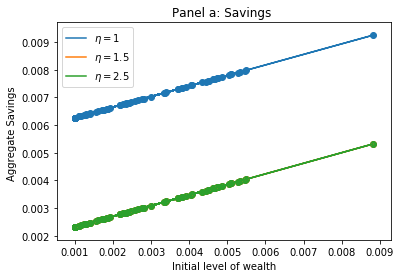

In [76]:
# Aggregate savings & aggregate debt
#A= sum (a) >0

A1=[]
for i in range(0,100):
    if assets_1[i]>0:
        A_1 = sum(assets_1[i])
        A1.append(A_1)

A15=[]
for i in range(0,100):
    if assets_15[i]>0:
        A_15 = sum(assets_15[i])
        A15.append(A_15)

A25=[]
for i in range(0,100):
    if assets_25[i]>0:
        A_25 = sum(assets_25[i])
        A25.append(A_25)

A3=[]
for i in range(0,100):
    if assets_3[i]>0:
        A_3 = sum(assets_3[i])
        A3.append(A_3)

# D = sum(a) <0 is by assumption of clearing conditions

        
# A3 has no positive savings
# only D3 has values

plt.plot(y0, A1, label='$\eta=1$')
plt.plot(y0, A15, label='$\eta=1.5$')
plt.plot(y0, A25, label='$ \eta=2.5$')
plt.scatter(y0,A1)
plt.scatter(y0,A15)
plt.scatter(y0,A25)
plt.xlabel('Initial level of wealth')
plt.ylabel('Aggregate Savings ')
plt.title('Panel a: Savings ')
plt.legend()

## [2] With flat-rate taxes 

In [32]:
import numpy as np
from numpy import *
from scipy.optimize import *
from itertools import product
import matplotlib.pyplot as plt

random.seed(10)
#DISTRIBUTION OBJECT
eta=[1, 1.5, 2.5, 3]
eps=np.random.choice([-0.05,0.05],size=100,p=[0.5,0.5])
eps = np.array(eps)
y0 = np.random.uniform(0.001,0.009,100)
for (i, item) in enumerate(y0):
    if 0.0055<item<0.0087:
        y0[i] = 0.001
y0=np.asarray(y0)
eps=np.random.choice([-0.05,0.05],size=100,p=[0.5,0.5])
eps =np.array(eps)
Distri= list (product(eta,y0))

# SYSTEM OF EQUATIONS

# Solvem the system of equations for a specific rate of return and eta=1
solution1=[]
for i in y0:
    for k in eps: 
        def GE(x):
            eta=1
            r=0.55
            sigma=3
            kappa=4
            nu=4
            beta=0.99
            tau=0.115
            T0 = eta*tau*(1/100)
            T1 = (eta+k)*(1/100)
            a = x[0]
            h0 = x[1]
            h1 = x[2]
            lamda = x[3]
            c0 = x[4]
            c1 = x[5]


            F = empty((6))
            F[0]= np.power((1-tau)*eta*h0 + i + T0 -a, -sigma)*(1-tau)*eta - kappa*np.power(h0,1/nu)
            F[1]= beta*np.power((((1-tau)*eta*h1)+(1+r)*a + T1), -sigma)*(1-tau)*eta - kappa*np.power(h1,1/nu)
            F[2]= beta*(np.power(((1-tau)*eta*h1)+(1+r)*a + T1,-sigma)*(1+r)) - lamda - np.power((1-tau)*eta*h0 + i + T0 -a, -sigma)
            F[3]= ((1-tau)*eta*h0 + i + T0 -a) + (1/(1+r))*((1-tau)*(eta+k)*h1 + (1+r)*a + T1) - i - (1+r)*(eta+k)*h1
            F[4]= (1-tau)*eta*h0 +i + T0 -a -c0
            F[5]= (1-tau)*(eta+k)*h1 + (1+r)*a + T1 - c1
            return F

    xGuess= np.array([0.05,0.1,0.1, 0.6, 0.8,0.95])
    x = fsolve(GE, xGuess) 

    solution1.append(x)
    sol_mat=np.matrix(solution1)

assets_1=sol_mat[:,0]
c0_1=sol_mat[:,4]
c1_1=sol_mat[:,5]
h0_1=sol_mat[:,1]
h1_1=sol_mat[:,2]
sum(assets_1)

0.6767405253661145

In [37]:
#eta =1.5
solution15=[]
for i in y0:
    for k in eps: 
        def GE(x):
            eta=1.5
            r=0.52
            sigma=3
            kappa=4
            nu=4
            beta=0.99
            tau=0.115
            T0 = eta*tau*(1/100)
            T1 = (eta+k)*(1/100)
            a = x[0]
            h0 = x[1]
            h1 = x[2]
            lamda = x[3]
            c0 = x[4]
            c1 = x[5]


            F = empty((6))
            F[0]= np.power((1-tau)*eta*h0 + i + T0 -a, -sigma)*(1-tau)*eta - kappa*np.power(h0,1/nu)
            F[1]= beta*np.power((((1-tau)*eta*h1)+(1+r)*a + T1), -sigma)*(1-tau)*eta - kappa*np.power(h1,1/nu)
            F[2]= beta*(np.power(((1-tau)*eta*h1)+(1+r)*a + T1,-sigma)*(1+r)) - lamda - np.power((1-tau)*eta*h0 + i + T0 -a, -sigma)
            F[3]= ((1-tau)*eta*h0 + i + T0 -a) + (1/(1+r))*((1-tau)*(eta+k)*h1 + (1+r)*a + T1) - i - (1+r)*(eta+k)*h1
            F[4]= (1-tau)*eta*h0 +i + T0 -a -c0
            F[5]= (1-tau)*(eta+k)*h1 + (1+r)*a + T1 - c1
            return F

    xGuess= np.array([0.05,0.1,0.1, 0.6, 0.8,0.95])
    x = fsolve(GE, xGuess) 

    solution15.append(x)
    sol_mat=np.matrix(solution15)

assets_15=sol_mat[:,0]
c0_15=sol_mat[:,4]
c1_15=sol_mat[:,5]
h0_15=sol_mat[:,1]
h1_15=sol_mat[:,2]
sum(assets_15)

-0.24846647966496868

In [38]:
solution25=[]
for i in y0:
    for k in eps: 
        def GE(x):
            eta=2.5
            r=0.53
            sigma=3
            kappa=4
            nu=4
            beta=0.99
            tau=0.115
            T0 = eta*tau*(1/100)
            T1 = (eta+k)*(1/100)
            a = x[0]
            h0 = x[1]
            h1 = x[2]
            lamda = x[3]
            c0 = x[4]
            c1 = x[5]


            F = empty((6))
            F[0]= np.power((1-tau)*eta*h0 + i + T0 -a, -sigma)*(1-tau)*eta - kappa*np.power(h0,1/nu)
            F[1]= beta*np.power((((1-tau)*eta*h1)+(1+r)*a + T1), -sigma)*(1-tau)*eta - kappa*np.power(h1,1/nu)
            F[2]= beta*(np.power(((1-tau)*eta*h1)+(1+r)*a + T1,-sigma)*(1+r)) - lamda - np.power((1-tau)*eta*h0 + i + T0 -a, -sigma)
            F[3]= ((1-tau)*eta*h0 + i + T0 -a) + (1/(1+r))*((1-tau)*(eta+k)*h1 + (1+r)*a + T1) - i - (1+r)*(eta+k)*h1
            F[4]= (1-tau)*eta*h0 +i + T0 -a -c0
            F[5]= (1-tau)*(eta+k)*h1 + (1+r)*a + T1 - c1
            return F

    xGuess= np.array([0.05,0.1,0.1, 0.6, 0.8,0.95])
    x = fsolve(GE, xGuess) 

    solution25.append(x)
    sol_mat=np.matrix(solution25)

assets_25=sol_mat[:,0]
c0_25=sol_mat[:,4]
c1_25=sol_mat[:,5]
h0_25=sol_mat[:,1]
h1_25=sol_mat[:,2]
sum(assets_25)

0.2822134501368261

In [39]:
solution3=[]
for i in y0:
    for k in eps: 
        def GE(x):
            eta=3
            r=0.52
            sigma=3
            kappa=4
            nu=4
            beta=0.99
            tau=0.115
            T0 = eta*tau*(1/100)
            T1 = (eta+k)*(1/100)
            a = x[0]
            h0 = x[1]
            h1 = x[2]
            lamda = x[3]
            c0 = x[4]
            c1 = x[5]


            F = empty((6))
            F[0]= np.power((1-tau)*eta*h0 + i + T0 -a, -sigma)*(1-tau)*eta - kappa*np.power(h0,1/nu)
            F[1]= beta*np.power((((1-tau)*eta*h1)+(1+r)*a + T1), -sigma)*(1-tau)*eta - kappa*np.power(h1,1/nu)
            F[2]= beta*(np.power(((1-tau)*eta*h1)+(1+r)*a + T1,-sigma)*(1+r)) - lamda - np.power((1-tau)*eta*h0 + i + T0 -a, -sigma)
            F[3]= ((1-tau)*eta*h0 + i + T0 -a) + (1/(1+r))*((1-tau)*(eta+k)*h1 + (1+r)*a + T1) - i - (1+r)*(eta+k)*h1
            F[4]= (1-tau)*eta*h0 +i + T0 -a -c0
            F[5]= (1-tau)*(eta+k)*h1 + (1+r)*a + T1 - c1
            return F

    xGuess= np.array([0.05,0.1,0.1, 0.6, 0.8,0.95])
    x = fsolve(GE, xGuess) 

    solution3.append(x)
    sol_mat=np.matrix(solution3)

assets_3=sol_mat[:,0]
c0_3=sol_mat[:,4]
c1_3=sol_mat[:,5]
h0_3=sol_mat[:,1]
h1_3=sol_mat[:,2]
sum(assets_3)

-0.38084213623092983

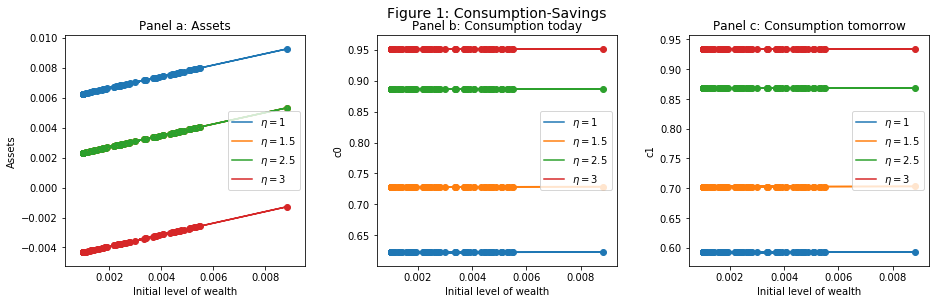

In [40]:
#PLOT
#PLOT
# Convert every output in an array
y0=np.asarray(y0)
assets_1=np.asarray(assets_1)
assets_15=np.asarray(assets_25)
assets_25=np.asarray(assets_25)
assets_3=np.asarray(assets_3)
c0_1=np.asarray(c0_1)
c0_15=np.asarray(c0_15)
c0_25=np.asarray(c0_25)
c0_3=np.asarray(c0_3)
c1_1=np.asarray (c1_1)
c1_15=np.asarray (c1_15)
c1_25=np.asarray (c1_25)
c1_3=np.asarray (c1_3)
h0_1=np.asarray(h0_1)
h0_15=np.asarray(h0_15)
h0_25=np.asarray(h0_25)
h0_3=np.asarray(h0_3)
h1_1=np.asarray(h1_1)
h1_15=np.asarray(h1_15)
h1_25=np.asarray(h1_25)
h1_3=np.asarray(h1_3)

plt.figure(1)
plt.suptitle('Figure 1: Consumption-Savings', x=1, y=1, fontsize=14)

plt.subplot(131)
plt.plot(y0, assets_1, label='$\eta=1$')
plt.plot(y0, assets_15, label='$\eta=1.5$')
plt.plot(y0, assets_25, label='$\eta=2.5$')
plt.plot(y0, assets_3, label='$\eta=3$')
plt.scatter(y0,assets_1)
plt.scatter(y0,assets_15)
plt.scatter(y0,assets_25)
plt.scatter(y0,assets_3)
plt.xlabel('Initial level of wealth')
plt.ylabel('Assets')
plt.title('Panel a: Assets')
plt.legend()
plt.subplots_adjust(top=0.9, bottom=0.1, left=0, right=2, hspace=0.5, wspace=0.3)

plt.subplot(132)
plt.plot(y0, c0_1, label='$\eta=1$')
plt.plot(y0, c0_15, label='$\eta=1.5$')
plt.plot(y0, c0_25, label='$\eta=2.5$')
plt.plot(y0, c0_3, label='$\eta=3$')
plt.scatter(y0,c0_1)
plt.scatter(y0,c0_15)
plt.scatter(y0,c0_25)
plt.scatter(y0,c0_3)
plt.xlabel('Initial level of wealth')
plt.ylabel('c0')
plt.title('Panel b: Consumption today')
plt.legend()
plt.subplots_adjust(top=0.9, bottom=0.1, left=0, right=2, hspace=0.5, wspace=0.3)

plt.subplot(133)
plt.plot(y0, c1_1, label='$\eta=1$')
plt.plot(y0, c1_15, label='$\eta=1.5$')
plt.plot(y0, c1_25, label='$\eta=2.5$')
plt.plot(y0, c1_3, label='$\eta=3$')
plt.scatter(y0,c1_1)
plt.scatter(y0,c1_15)
plt.scatter(y0,c1_25)
plt.scatter(y0,c1_3)
plt.xlabel('Initial level of wealth')
plt.ylabel('c1')
plt.title('Panel c: Consumption tomorrow')
plt.legend()
plt.subplots_adjust(top=0.9, bottom=0.1, left=0, right=2, hspace=0.5, wspace=0.3)
             
plt.subplots_adjust(top=0.9, bottom=0.1, left=0, right=2, hspace=0.5, wspace=0.3)

### Introducing tax clearing condition 
$T0 = eta*tau*(1/100)$

$T1 = (eta+k)*(1/100)$

As we see return rate decreased to around 0.53 from 0.65 before